In [24]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [25]:
laliga_df = pd.read_csv("https://raw.githubusercontent.com/soccermatics/Soccermatics/refs/heads/main/course/lessons/lesson2/playerstats.csv")
laliga_df.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,...,npxG,xA,npxG+xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA.1,Matches,-9999
0,1,Luis Abram,pe PER,DF,Granada,25.0,1996.0,8,6,560,...,0.5,0.0,0.5,0.08,0.00,0.08,0.08,0.08,Matches,1f462f95
1,2,Marcos Acuña,ar ARG,DF,Sevilla,29.0,1991.0,31,26,2260,...,1.4,3.0,4.4,0.06,0.12,0.18,0.06,0.18,Matches,81442ecb
2,3,Martin Agirregabiria,es ESP,DF,Alavés,25.0,1996.0,24,17,1616,...,0.2,1.0,1.2,0.01,0.05,0.07,0.01,0.07,Matches,355c883a
3,4,Julen Agirrezabala,es ESP,GK,Athletic Club,20.0,2000.0,4,4,360,...,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,Matches,a2c1a8d3
4,5,Sergio Agüero,ar ARG,FW,Barcelona,33.0,1988.0,4,2,151,...,1.1,0.3,1.3,0.64,0.16,0.80,0.64,0.80,Matches,4d034881


In [26]:
# Create minutes model dataframe

minutes_model = pd.DataFrame()
minutes_model = minutes_model.assign(minutes=laliga_df["Min"])
minutes_model = minutes_model.assign(age=laliga_df["Age"])
minutes_model = minutes_model.assign(age_squared=np.power(laliga_df["Age"], 2))
minutes_model = minutes_model.assign(age_cubed=np.power(laliga_df["Age"], 3))

minutes_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   minutes      617 non-null    int64  
 1   age          616 non-null    float64
 2   age_squared  616 non-null    float64
 3   age_cubed    616 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 19.4 KB


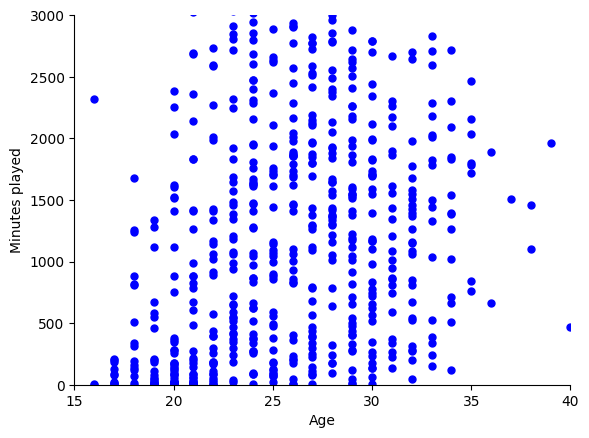

In [27]:
# Plot data
fig,ax=plt.subplots(num=1)
ax.plot(minutes_model['age'], minutes_model['minutes'], linestyle='none', marker= '.', markersize= 10, color='blue')
ax.set_ylabel('Minutes played')
ax.set_xlabel('Age')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlim((15,40))
plt.ylim((0,3000))
plt.show()

In [28]:
model_fit=smf.ols(formula='minutes  ~ age   ', data=minutes_model).fit()
print(model_fit.summary())
b=model_fit.params

                            OLS Regression Results                            
Dep. Variable:                minutes   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     73.92
Date:                Sat, 03 May 2025   Prob (F-statistic):           6.77e-17
Time:                        16:17:42   Log-Likelihood:                -5070.1
No. Observations:                 616   AIC:                         1.014e+04
Df Residuals:                     614   BIC:                         1.015e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -536.3642    207.420     -2.586      0.0

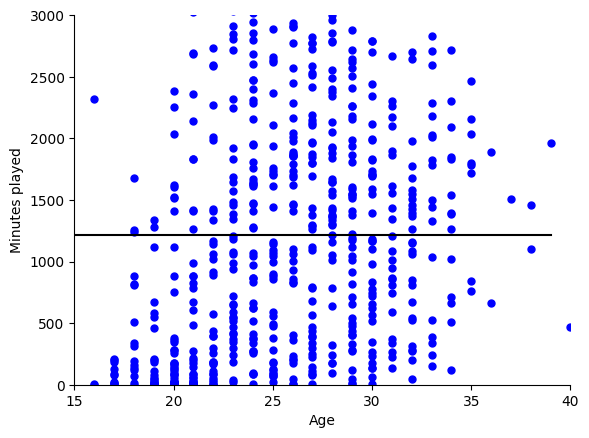

In [29]:
# Plot the data
fig,ax=plt.subplots(num=1)
ax.plot(minutes_model['age'], minutes_model['minutes'], linestyle='none', marker= '.', markersize= 10, color='blue')
ax.set_ylabel('Minutes played')
ax.set_xlabel('Age')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlim((15,40))
plt.ylim((0,3000))

# Create the line through the data
x = np.arange(40,step=1)
y = np.mean(minutes_model['minutes'])*np.ones(40)
ax.plot(x, y, color='black')

# Show distances to line for each point
# for i,a in enumerate(minutes_model['age']):
#     ax.plot([a,a],[minutes_model['minutes'][i], np.mean(minutes_model['minutes']) ], color='red')
# plt.show()

/var/folders/5d/_v0r0r510wncd2w765n36ksw0000gn/T/ipykernel_9289/1696573679.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = b[0] + b[1]*x


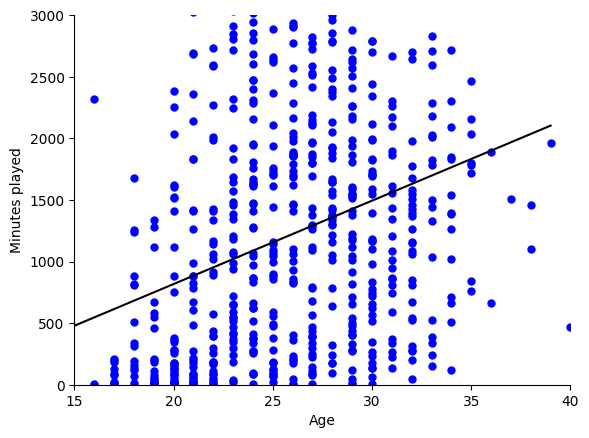

In [30]:
# Plot the data
fig,ax=plt.subplots(num=1)
ax.plot(minutes_model['age'], minutes_model['minutes'], linestyle='none', marker= '.', markersize= 10, color='blue')
ax.set_ylabel('Minutes played')
ax.set_xlabel('Age')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlim((15,40))
plt.ylim((0,3000))

# Create the line through the data
x = np.arange(40,step=1)
y = b[0] + b[1]*x
ax.plot(x, y, color='black')

# Show distances to line for each point
# for i,a in enumerate(minutes_model['age']):
#     ax.plot([a,a],[minutes_model['minutes'][i], np.mean(minutes_model['minutes']) ], color='red')
# plt.show()

                            OLS Regression Results                            
Dep. Variable:                minutes   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     51.35
Date:                Sat, 03 May 2025   Prob (F-statistic):           2.41e-21
Time:                        16:17:42   Log-Likelihood:                -5057.4
No. Observations:                 616   AIC:                         1.012e+04
Df Residuals:                     613   BIC:                         1.013e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5255.8833    951.226     -5.525      

/var/folders/5d/_v0r0r510wncd2w765n36ksw0000gn/T/ipykernel_9289/1608548276.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y= b[0] + b[1]*x + b[2]*x*x


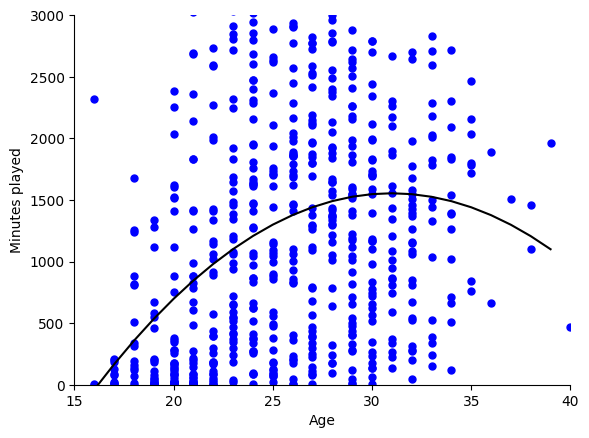

In [31]:
# Fit the model
model_fit=smf.ols(formula='minutes  ~ age + age_squared  ', data=minutes_model).fit()
print(model_fit.summary())
b=model_fit.params

# Compare the fit
fig,ax=plt.subplots(num=1)
ax.plot(minutes_model['age'], minutes_model['minutes'], linestyle='none', marker= '.', markersize= 10, color='blue')
ax.set_ylabel('Minutes played')
ax.set_xlabel('Age')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlim((15,40))
plt.ylim((0,3000))
x=np.arange(40,step=1)
y= b[0] + b[1]*x + b[2]*x*x
ax.plot(x, y, color='black')

# for i,a in enumerate(minutes_model['age']):
#     ax.plot([a,a],[minutes_model['minutes'][i], b[0] + b[1]*a + b[2]*a*a], color='red')
# plt.show()

                            OLS Regression Results                            
Dep. Variable:                minutes   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     34.82
Date:                Sat, 03 May 2025   Prob (F-statistic):           8.73e-21
Time:                        16:17:43   Log-Likelihood:                -5056.6
No. Observations:                 616   AIC:                         1.012e+04
Df Residuals:                     612   BIC:                         1.014e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.024e+04   4002.240     -2.559      

/var/folders/5d/_v0r0r510wncd2w765n36ksw0000gn/T/ipykernel_9289/3668693209.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y= b[0] + b[1]*x + b[2]*x*x + b[3] *x*x*x


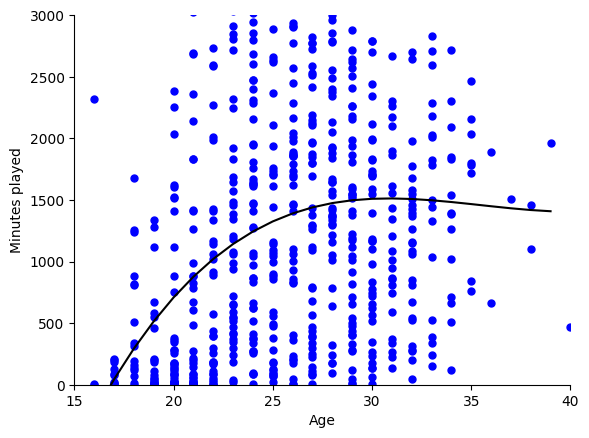

In [32]:
# Fit the model
model_fit=smf.ols(formula='minutes  ~ age + age_squared + age_cubed ', data=minutes_model).fit()
print(model_fit.summary())
b=model_fit.params

# Compare the fit
fig,ax=plt.subplots(num=1)
ax.plot(minutes_model['age'], minutes_model['minutes'], linestyle='none', marker= '.', markersize= 10, color='blue')
ax.set_ylabel('Minutes played')
ax.set_xlabel('Age')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlim((15,40))
plt.ylim((0,3000))
x=np.arange(40,step=1)
y= b[0] + b[1]*x + b[2]*x*x + b[3] *x*x*x
ax.plot(x, y, color='black')

# for i,a in enumerate(minutes_model['age']):
#     ax.plot([a,a],[minutes_model['minutes'][i], b[0] + b[1]*a + b[2]*a*a], color='red')
# plt.show()